In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 300
pd.options.display.float_format = "{:.2f}".format

seed = 421
tf.random.set_seed(seed)
np.random.seed(seed)


print("Imported modules.")

Imported modules.


In [2]:
dataFrame = pd.read_csv("bodyfat.csv")
dataFrame = dataFrame.reindex(np.random.permutation(dataFrame.index))

#add bmi feature cross
dataFrame['BMI'] = dataFrame['Weight'] * dataFrame['Weight']
dataFrame['BMI'] = dataFrame['BMI'] / dataFrame['Height']
dataFrame['StaticWaistRatio'] = (dataFrame['Ankle'] + dataFrame['Knee'] + dataFrame['Wrist'])/dataFrame['Abdomen']
dataFrame['ChestWaistRatio'] = dataFrame['Chest'] / dataFrame['Abdomen']
dataFrame['HipThighRatio'] = dataFrame['Hip'] / dataFrame['Thigh']

dataFrame = dataFrame.drop(columns=['Density', 'Height', 'Weight'])

print("Data set loaded. Num examples: ", len(dataFrame))

trainDF = dataFrame.sample(frac = 0.8)
testDF = dataFrame.drop(trainDF.index)

print("Made training and test sets")

dataFrame.describe()

Data set loaded. Num examples:  252
Made training and test sets


,BodyFat,Age,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,StaticWaistRatio,ChestWaistRatio,HipThighRatio
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,19.15,44.88,37.99,100.82,92.56,99.90,59.41,38.59,23.10,32.27,28.66,18.23,468.75,0.87,1.09,1.69
std,8.37,12.60,2.43,8.43,10.78,7.16,5.25,2.41,1.69,3.02,2.02,0.93,169.55,0.07,0.06,0.07
min,0.00,22.00,31.10,79.30,69.40,85.00,47.20,33.00,19.10,24.80,21.00,15.80,206.50,0.65,0.92,1.45
25%,12.47,35.75,36.40,94.35,84.57,95.50,56.00,36.98,22.00,30.20,27.30,17.60,360.65,0.82,1.06,1.64
50%,19.20,43.00,38.00,99.65,90.95,99.30,59.00,38.50,22.80,32.05,28.70,18.30,433.20,0.87,1.09,1.69
75%,25.30,54.00,39.42,105.38,99.33,103.53,62.35,39.92,24.00,34.32,30.00,18.80,539.18,0.92,1.13,1.73
max,47.50,81.00,51.20,136.20,148.10,147.70,87.30,49.10,33.90,45.00,34.90,21.40,1825.30,1.07,1.27,1.87


In [3]:
# Keras Input tensors of float values.
inputs = {
    'Age':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Age'),
    'BMI':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='BMI'),
    'ChestWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ChestWaistRatio'),
    'HipThighRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='HipThighRatio'),
    'Neck':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Neck'),
    'StaticWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='StaticWaistRatio'),
    'Chest':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Chest'),
    'Abdomen':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Abdomen'),
    'Hip':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Hip'),
    'Thigh':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Thigh'),
    'Knee':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Knee'),
    'Ankle':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Ankle'),
    'Biceps':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Biceps'),
    'Forearm':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Forearm'),
    'Wrist':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Wrist')
}



log_bmi = np.log(trainDF['BMI'])
bmi = tf.keras.layers.Normalization(
    axis=None)
bmi.adapt(log_bmi)
bmi.adapt(trainDF['BMI'])
bmi = bmi(inputs.get('BMI'))



age = tf.keras.layers.Normalization(
    name = 'normalization_age',
    axis=None)
age.adapt(trainDF['Age'])
age = age(inputs.get('Age'))


chestwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_chestwaistratio',
    axis=None)
chestwaistratio.adapt(trainDF['ChestWaistRatio'])
chestwaistratio = chestwaistratio(inputs.get('ChestWaistRatio'))



hipthighratio = tf.keras.layers.Normalization(
    name = 'normalization_hipthighratio',
    axis=None)
hipthighratio.adapt(trainDF['HipThighRatio'])
hipthighratio = hipthighratio(inputs.get('HipThighRatio'))


neck = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
neck.adapt(trainDF['Neck'])
neck = neck(inputs.get('Neck'))

chest = tf.keras.layers.Normalization(
    name = 'normalization_chest',
    axis=None)
chest.adapt(trainDF['Chest'])
chest = chest(inputs.get('Chest'))

abdomen = tf.keras.layers.Normalization(
    name = 'normalization_abdomen',
    axis=None)
abdomen.adapt(trainDF['Abdomen'])
abdomen = abdomen(inputs.get('Abdomen'))

hip = tf.keras.layers.Normalization(
    name = 'normalization_hip',
    axis=None)
hip.adapt(trainDF['Hip'])
hip = hip(inputs.get('Hip'))

thigh = tf.keras.layers.Normalization(
    name = 'normalization_thigh',
    axis=None)
thigh.adapt(trainDF['Thigh'])
thigh = thigh(inputs.get('Thigh'))

knee = tf.keras.layers.Normalization(
    name = 'normalization_knee',
    axis=None)
knee.adapt(trainDF['Knee'])
knee = knee(inputs.get('Knee'))

ankle = tf.keras.layers.Normalization(
    name = 'normalization_ankle',
    axis=None)
ankle.adapt(trainDF['Ankle'])
ankle = ankle(inputs.get('Ankle'))

biceps = tf.keras.layers.Normalization(
    name = 'normalization_biceps',
    axis=None)
biceps.adapt(trainDF['Biceps'])
biceps = biceps(inputs.get('Biceps'))

forearm = tf.keras.layers.Normalization(
    name = 'normalization_forearm',
    axis=None)
forearm.adapt(trainDF['Forearm'])
forearm = forearm(inputs.get('Forearm'))

wrist = tf.keras.layers.Normalization(
    name = 'normalization_wrist',
    axis=None)
wrist.adapt(trainDF['Wrist'])
wrist = wrist(inputs.get('Wrist'))


staticwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_staticwaistratio',
    axis=None)
staticwaistratio.adapt(trainDF['StaticWaistRatio'])
staticwaistratio = staticwaistratio(inputs.get('StaticWaistRatio'))

# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(list(inputs.values()))

print("Preprocessing layers defined.")

Preprocessing layers defined.


In [4]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse_training, mse_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.yscale("log")  # Set y-axis scale to logarithmic

    plt.plot(epochs, mse_training, label="Training Loss")
    plt.plot(epochs, mse_validation, label="Validation Loss")

    merged_mse_lists = mse_training.tolist() + mse_validation
    highest_loss = max(merged_mse_lists)
    lowest_loss = min(merged_mse_lists)
    top_of_y_axis = highest_loss * 1.03
    bottom_of_y_axis = lowest_loss * 0.97

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.legend()
    plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [5]:
#@title Define functions to create and train a linear regression model
def create_model(my_inputs, my_outputs, my_learning_rate, l2_regularization):
    """Create and compile a simple linear regression model."""
    model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

    # Add L2 regularization to all trainable weights in the model.
    regularizer = tf.keras.regularizers.l2(l2_regularization)
    for layer in model.layers:
        for attr in ['kernel_regularizer', 'bias_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=my_learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

# Create Normalization layers
train_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
train_bodyfat_normalized.adapt(
    np.array(trainDF['BodyFat']))

test_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
test_bodyfat_normalized.adapt(
    np.array(testDF['BodyFat']))

def train_model(model, dataset, epochs, batch_size, label_name, patienceNo, validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = train_bodyfat_normalized(
        np.array(features.pop(label_name)))
    # Define the early stopping criteria
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patienceNo, mode='min')
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, callbacks=[early_stopping], validation_split=validation_split)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse, history.history

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [6]:
#@title Define linear regression model outputs
def get_outputs_linear_regression():
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(preprocessing_layers)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }
  return outputs

In [7]:
def get_outputs_dnn():
  # Create a Dense layer with 20 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=10, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=7, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_3')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=5, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_4')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=3, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_5')(dense_output)
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

Epoch 1/800
10/10 [==============================] - 1s 27ms/step - loss: 3.7493 - mean_squared_error: 3.7493 - val_loss: 1.5029 - val_mean_squared_error: 1.5029
Epoch 2/800
10/10 [==============================] - 0s 6ms/step - loss: 2.9683 - mean_squared_error: 2.9683 - val_loss: 1.3098 - val_mean_squared_error: 1.3098
Epoch 3/800
10/10 [==============================] - 0s 6ms/step - loss: 2.3566 - mean_squared_error: 2.3566 - val_loss: 1.1717 - val_mean_squared_error: 1.1717
Epoch 4/800
10/10 [==============================] - 0s 6ms/step - loss: 1.9222 - mean_squared_error: 1.9222 - val_loss: 1.0779 - val_mean_squared_error: 1.0779
Epoch 5/800
10/10 [==============================] - 0s 6ms/step - loss: 1.6044 - mean_squared_error: 1.6044 - val_loss: 1.0097 - val_mean_squared_error: 1.0097
Epoch 6/800
10/10 [==============================] - 0s 6ms/step - loss: 1.3907 - mean_squared_error: 1.3907 - val_loss: 0.9631 - val_mean_squared_error: 0.9631
Epoch 7/800
10/10 [==============

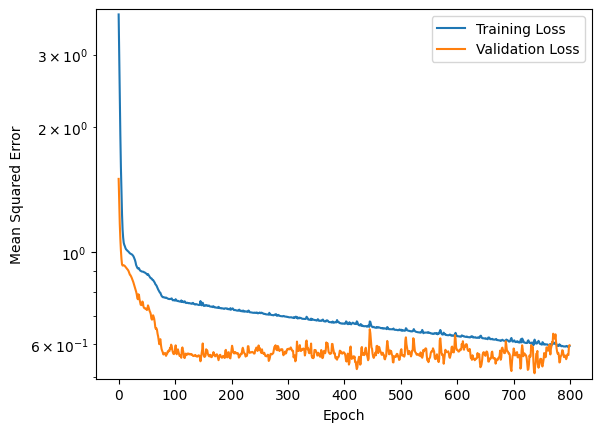


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 3ms/step - loss: 0.6078 - mean_squared_error: 0.6078


{'loss': 0.6077667474746704, 'mean_squared_error': 0.6077667474746704}

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.00008
epochs = 800
batch_size = 20
l2_regularization = 0.05
patience = 100

# Specify the label
label_name = "BodyFat"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.1

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate, l2_regularization)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined in our inputs.
epochs, mse, history = train_model(my_model, trainDF, epochs,
                                   batch_size, label_name, patience, validation_split)
plot_the_loss_curve(epochs, mse, history["val_mean_squared_error"])

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in testDF.items()}
test_label = test_bodyfat_normalized(np.array(test_features.pop(label_name))) # isolate the label

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)

In [11]:
#Output weights
input_layer = my_model.layers[16]
weights, biases = input_layer.get_weights()

weights_table = pd.DataFrame(columns=['Feature', 'Total Weight'])

for feature, i in zip(inputs, weights):
    for j in i:
        j = abs(j)
        if feature not in weights_table['Feature'].values:
            row = pd.DataFrame({'Feature': feature, 'Total Weight': j}, index=[0])
            weights_table = pd.concat([weights_table, row], ignore_index=True)
        else:
            condition = weights_table['Feature'] == feature
            index = weights_table.loc[condition, 'Total Weight'].index
            weights_table.loc[condition, 'Total Weight'] = weights_table.loc[condition, 'Total Weight'][index] + j

weights_table = weights_table.sort_values(by='Total Weight', ascending=False)
weights_table


,Feature,Total Weight
6,Chest,4.31
8,Hip,3.30
12,Biceps,3.16
14,Wrist,3.03
5,StaticWaistRatio,2.95
0,Age,2.88
11,Ankle,2.87
1,BMI,2.83
7,Abdomen,2.73
13,Forearm,2.68


In [10]:
# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['Row', 'Predicted Body Fat', 'Correct Body Fat', 'Difference +-'])

# Get the mean and variance from the normalization layer
mean = train_bodyfat_normalized.mean.numpy()
variance = train_bodyfat_normalized.variance.numpy()

# Get the minimum and maximum values of the original body fat data
min_value = trainDF['BodyFat'].min()
max_value = trainDF['BodyFat'].max()

# Iterate over the rows of the test dataframe
for index, row in testDF.iterrows():
    test_features = {name: np.array([value]) for name, value in row.items() if name != 'BodyFat'}

    # Get the correct label for the current row
    correct_label = np.array([row['BodyFat']])
    correct_label_normalized = (correct_label - mean) / np.sqrt(variance)

    # Make predictions using the model
    predictions = my_model.predict(test_features, verbose=0)

    predicted_bodyfat_normalized = predictions['dense_output'][0][0]
    predicted_bodyfat = (predicted_bodyfat_normalized * np.sqrt(variance)) + mean
    predicted_bodyfat = np.round(predicted_bodyfat, decimals=1)

    actual_bodyfat = np.round((correct_label_normalized * np.sqrt(variance)) + mean, decimals=1)
    difference = np.round(predicted_bodyfat - actual_bodyfat, 1)
    row_data = pd.DataFrame({'Row': [index],
                             'Predicted Body Fat': [predicted_bodyfat],
                             'Correct Body Fat': [actual_bodyfat],
                             'Difference +-': [difference]})

    # Concatenate the row DataFrame to the result_table
    result_table = pd.concat([result_table, row_data], ignore_index=True)

pd.options.display.max_rows = 100
result_table

,Row,Predicted Body Fat,Correct Body Fat,Difference +-
0,92,[18.8],[8.5],[10.3]
1,165,[22.5],[19.2],[3.3]
2,51,[12.3],[6.6],[5.7]
3,63,[22.5],[25.8],[-3.3]
4,198,[14.1],[6.6],[7.5]
5,215,[22.5],[47.5],[-25.0]
6,14,[18.7],[22.1],[-3.4]
7,76,[15.9],[8.8],[7.1]
8,210,[14.0],[7.1],[6.9]
9,98,[19.3],[17.8],[1.5]
